# A MULTI-OBJECTIVE APPROACH FOR PRACTICAL PORTFOLIO OPTIMIZATION PROBLEM

## Install requirements

In [ ]:
from IPython.display import clear_output

In [ ]:
!pip install yfinance
!pip install fix_yahoo_finance
!pip install pymoo
clear_output()

In [ ]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

## Pull the stock price data

In [ ]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '2018-01-01' #'2015-01-01'
end_date = '2020-12-31'   #'2022-07-12'

# Set the ticker
# ticker = ['AMZN', 'SPY', 'TSLA', 'FB']


ticker = ['SPY', 'FB', 'JCI', 'CMCSA', 'CPB', 'MO', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T']

# Get the data
data = yf.download(ticker, start_date, end_date)
data

[*********************100%***********************]  24 of 24 completed


Adj Close                                                          \
                  BAX        BMY      CMCSA        CNP        CPB          DE   
Date                                                                            
2018-01-02  63.679161  53.039040  37.365726  24.048304  40.628277  147.142944   
2018-01-03  64.703049  53.082294  36.765266  23.996807  40.053875  147.813416   
2018-01-04  64.854744  53.770206  37.001804  24.022552  40.388229  148.660858   
2018-01-05  65.584709  53.892105  37.338428  23.919565  40.542545  149.294083   
2018-01-08  65.679512  53.909527  36.828938  24.065464  40.834034  150.029755   
...               ...        ...        ...        ...        ...         ...   
2020-12-23  77.106804  57.782360  48.312672  20.696764  45.469307  262.604614   
2020-12-24  77.929276  57.924450  48.640934  20.773773  45.885159  263.849365   
2020-12-28  77.606178  57.896027  49.345734  20.610125  45.771744  262.173401   
2020-12-29  78.330727  58.180202  49.770550  20.504232  45.762291  260.056366   
2020-12-30  77.547424  58.653824  49.442280  20.619751  45.384251  261.599579   

                                                          ...   Volume  \
                    FB        HPQ        JCI         JPM  ...       NI   
Date                                                      ...            
2018-01-02  181.419998  18.645613  34.144886   94.219826  ...  2695100   
2018-01-03  184.669998  18.689339  34.796875   94.315811  ...  2130400   
2018-01-04  184.330002  18.829273  35.591778   95.666962  ...  3428800   
2018-01-05  186.850006  19.021673  34.314587   95.052818  ...  3340100   
2018-01-08  188.279999  19.100384  34.779018   95.193207  ...  2803700   
...                ...        ...        ...         ...  ...      ...   
2020-12-23  268.109985  23.271982  44.594631  119.331268  ...  3564200   
2020-12-24  267.399994  23.320045  44.604347  118.806496  ...  1097800   
2020-12-28  277.000000  23.329659  44.779152  119.588875  ...  2392400   
2020-12-29  276.779999  23.118179  44.575214  119.274017  ...  2639200   
2020-12-30  271.869995  23.377716  45.080204  119.607948  ...  2217400   

                                                                            \
               PCAR     PSA      SEE       SPY         T      TMO      TXT   
Date                                                                         
2018-01-02  2251500  812300  1837200  86655700  42626974  1140900  1186800   
2018-01-03  1428600  580000  1647800  90070400  51851150  1458300  1131100   
2018-01-04  3095100  799600  1842500  80636400  36894187  1566400  1189500   
2018-01-05  2024500  644600  2240400  83524000  29386048  1469500  2244100   
2018-01-08  2075600  768600  2106800  57319200  35276524  1974600  1237500   
...             ...     ...      ...       ...       ...      ...      ...   
2020-12-23   951400  720800   917800  46201400  52034656  1241000   722900   
2020-12-24   373000  154600   252800  26457900  25358704   442100   197500   
2020-12-28   586800  569900   344700  39000400  55104218   736500   559800   
2020-12-29   850900  677400   511800  53680500  48481570   803200   654100   
2020-12-30   561600  559200   413100  49455300  45476487   714800   822100   

                               
                  VZ     ZION  
Date                           
2018-01-02  16045300  2387100  
2018-01-03  16662400  1575700  
2018-01-04  12062800  3309200  
2018-01-05  13348900  1212200  
2018-01-08  16212700  1697700  
...              ...      ...  
2020-12-23  14012100   706800  
2020-12-24   7751100   327700  
2020-12-28  15355600   835600  
2020-12-29  15686100  1084100  
2020-12-30  18259800   728400  

[755 rows x 144 columns]

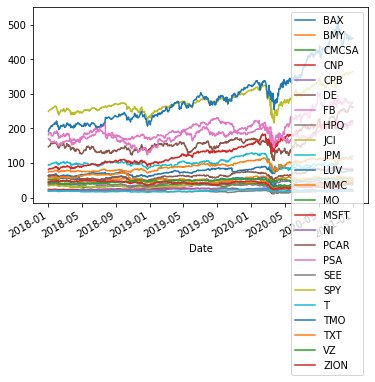

In [ ]:
# Plot adjusted close price data
data['Adj Close'].plot()
plt.show()

In [ ]:
# Closing price
data = data['Adj Close']
data

,BAX,BMY,CMCSA,CNP,CPB,DE,FB,HPQ,JCI,JPM,...,NI,PCAR,PSA,SEE,SPY,T,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,63.679161,53.039040,37.365726,24.048304,40.628277,147.142944,181.419998,18.645613,34.144886,94.219826,...,21.766851,62.070038,170.484497,46.133598,248.918106,19.613916,190.837280,56.905399,43.323387,44.894787
2018-01-03,64.703049,53.082294,36.765266,23.996807,40.053875,147.813416,184.669998,18.689339,34.796875,94.315811,...,21.629522,62.826576,170.856323,46.170940,250.492584,19.160976,194.337952,57.233128,42.433132,44.841648
2018-01-04,64.854744,53.770206,37.001804,24.022552,40.388229,148.660858,184.330002,18.829273,35.591778,95.666962,...,21.535107,63.625607,167.832016,46.273628,251.548309,19.339096,196.770645,57.183475,42.570717,45.027607
2018-01-05,65.584709,53.892105,37.338428,23.919565,40.542545,149.294083,186.850006,19.021673,34.314587,95.052818,...,21.277615,63.838135,166.848724,46.133598,253.224701,19.410345,200.142746,58.097130,42.473595,45.045319
2018-01-08,65.679512,53.909527,36.828938,24.065464,40.834034,150.029755,188.279999,19.100384,34.779018,95.193207,...,21.457857,63.634109,168.179062,46.338966,253.687775,19.466326,200.469070,57.948166,42.400757,44.823948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,77.106804,57.782360,48.312672,20.696764,45.469307,262.604614,268.109985,23.271982,44.594631,119.331268,...,20.638004,81.783333,209.747498,45.323498,360.056122,18.695726,456.898376,48.223282,54.377502,41.918182
2020-12-24,77.929276,57.924450,48.640934,20.773773,45.885159,263.849365,267.399994,23.320045,44.604347,118.806496,...,20.807558,82.763702,211.456894,45.186272,361.456818,18.656708,456.649109,47.983715,54.266830,41.754414
2020-12-28,77.606178,57.896027,49.345734,20.610125,45.771744,262.173401,277.000000,23.329659,44.779152,119.588875,...,21.005363,82.254303,211.724823,44.627563,364.562073,18.565670,459.280823,47.614384,54.395950,41.773678


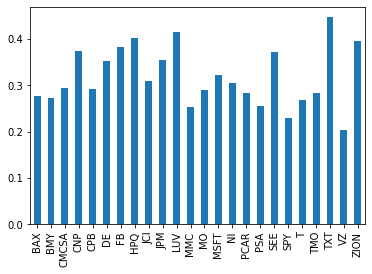

In [ ]:
# Volatility of stocks
data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

## Process on all dataset


In [ ]:
# Log of percentage change
cov_matrix = data.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,BAX,BMY,CMCSA,CNP,CPB,DE,FB,HPQ,JCI,JPM,...,NI,PCAR,PSA,SEE,SPY,T,TMO,TXT,VZ,ZION
BAX,0.000309,0.000125,0.000148,0.000178,0.000093,0.000181,0.000176,0.000179,0.000137,0.000192,...,0.000156,0.000142,0.000117,0.000101,0.000167,0.000141,0.000190,0.000208,0.000107,0.000174
BMY,0.000125,0.000298,0.000129,0.000155,0.000070,0.000170,0.000144,0.000152,0.000135,0.000165,...,0.000117,0.000129,0.000083,0.000137,0.000143,0.000120,0.000144,0.000189,0.000076,0.000143
CMCSA,0.000148,0.000129,0.000344,0.000203,0.000067,0.000223,0.000184,0.000244,0.000192,0.000255,...,0.000167,0.000181,0.000111,0.000171,0.000191,0.000193,0.000138,0.000296,0.000124,0.000231
CNP,0.000178,0.000155,0.000203,0.000562,0.000104,0.000266,0.000190,0.000283,0.000240,0.000325,...,0.000324,0.000187,0.000199,0.000264,0.000223,0.000205,0.000143,0.000362,0.000132,0.000279
CPB,0.000093,0.000070,0.000067,0.000104,0.000343,0.000041,0.000050,0.000048,0.000086,0.000064,...,0.000107,0.000062,0.000098,0.000037,0.000077,0.000078,0.000091,0.000060,0.000083,0.000026
DE,0.000181,0.000170,0.000223,0.000266,0.000041,0.000499,0.000226,0.000340,0.000270,0.000336,...,0.000187,0.000286,0.000140,0.000263,0.000242,0.000211,0.000187,0.000419,0.000123,0.000311
FB,0.000176,0.000144,0.000184,0.000190,0.000050,0.000226,0.000586,0.000254,0.000180,0.000224,...,0.000126,0.000173,0.000109,0.000160,0.000229,0.000124,0.000193,0.000232,0.000079,0.000149
HPQ,0.000179,0.000152,0.000244,0.000283,0.000048,0.000340,0.000254,0.000647,0.000277,0.000345,...,0.000195,0.000249,0.000122,0.000280,0.000256,0.000211,0.000176,0.000400,0.000121,0.000330
JCI,0.000137,0.000135,0.000192,0.000240,0.000086,0.000270,0.000180,0.000277,0.000380,0.000294,...,0.000156,0.000237,0.000128,0.000230,0.000198,0.000187,0.000140,0.000367,0.000100,0.000280
JPM,0.000192,0.000165,0.000255,0.000325,0.000064,0.000336,0.000224,0.000345,0.000294,0.000502,...,0.000208,0.000276,0.000136,0.000289,0.000258,0.000242,0.000166,0.000473,0.000131,0.000455


In [ ]:
# Yearly returns for individual companies
ind_er = data.resample('Y').last().pct_change().mean()
ind_er

BAX      0.120941
BMY      0.135881
CMCSA    0.252357
CNP     -0.090985
CPB      0.276114
DE       0.372753
FB       0.445149
HPQ      0.133076
JCI      0.290885
JPM      0.202255
LUV      0.020144
MMC      0.236871
MO      -0.014554
MSFT     0.498090
NI      -0.016439
PCAR     0.281282
PSA      0.103391
SEE      0.166705
SPY      0.244787
T        0.140387
TMO      0.440099
TXT      0.029908
VZ       0.063343
ZION     0.086937
dtype: float64

In [ ]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

BAX      0.277847
BMY      0.273163
CMCSA    0.293297
CNP      0.374921
CPB      0.292825
DE       0.353233
FB       0.382771
HPQ      0.402288
JCI      0.308224
JPM      0.354115
LUV      0.415967
MMC      0.252244
MO       0.288809
MSFT     0.321779
NI       0.304473
PCAR     0.284099
PSA      0.256120
SEE      0.371012
SPY      0.228991
T        0.267992
TMO      0.283052
TXT      0.447350
VZ       0.204467
ZION     0.396769
dtype: float64

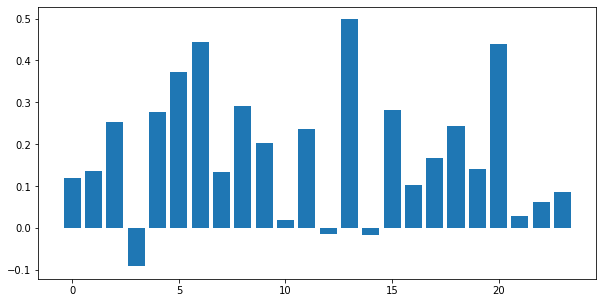

DONE


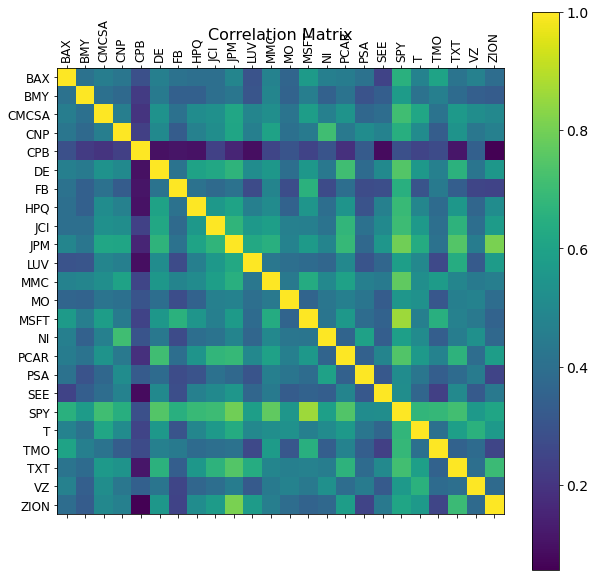

In [ ]:
mu = np.array(ind_er)
cov = np.array(cov_matrix)

corr_matrix = data.pct_change().apply(lambda x: np.log(1+x)).corr()
labels = data.columns

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
k = np.arange(len(mu))
ax.bar(k, mu)
plt.show()


f = plt.figure(figsize=(10, 10))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(k, labels, fontsize=12, rotation=90)
plt.yticks(k, labels, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
print("DONE")

## Solve problem with NSGA_II

In [ ]:
# import libs
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.repair import Repair
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import operator

In [ ]:
class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(n_var=len(np.array(ticker)), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

In [ ]:

class PortfolioRepair(Repair):

    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

In [ ]:
%%time
problem = PortfolioProblem(mu, cov)
algorithm = NSGA2(repair=PortfolioRepair())

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=False)

CPU times: user 18 s, sys: 81.1 ms, total: 18.1 s
Wall time: 18.7 s


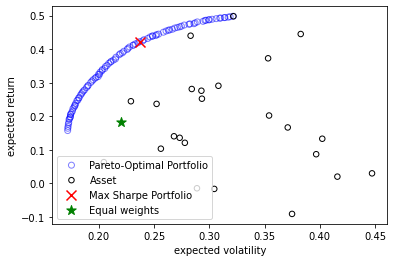

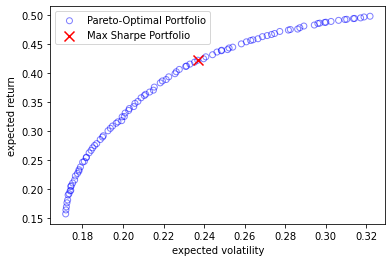

In [ ]:
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

# equal weights
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

In [ ]:
allocation = {name: w for name, w in zip(data.columns, X[max_sharpe])}
allocation = sorted(allocation.items(), key=operator.itemgetter(1), reverse=True)

print("Allocation With Best Sharpe")
for name, w in allocation:
    print(f"{name:<5} {w}")

Allocation With Best Sharpe
TMO   0.4073039789836272
MSFT  0.29494042893686157
CPB   0.208989161523532
FB    0.08219507942853223
JCI   0.004468482242062353
PCAR  0.002102868885384471
BAX   0.0
BMY   0.0
CMCSA 0.0
CNP   0.0
DE    0.0
HPQ   0.0
JPM   0.0
LUV   0.0
MMC   0.0
MO    0.0
NI    0.0
PSA   0.0
SEE   0.0
SPY   0.0
T     0.0
TXT   0.0
VZ    0.0
ZION  0.0


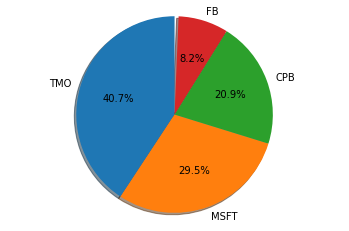

In [ ]:
for al in allocation:
    if al[1] <= 1e-2:
        allocation.remove(al)

col_name = []
w1 = []
for name, w in allocation:
    col_name.append(name)
    w1.append(w)
    
fig1, ax1 = plt.subplots()
ax1.pie(w1, labels=col_name, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

print("For equal weights: \nReturn     = ", (x.T @ mu)[0])
print("Volatility = ", (np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))[0][0])

For equal weights: 
Return     =  0.18414069769650415
Volatility =  0.22009100393776088


In [ ]:
x = X[max_sharpe].T

print("Best Sharpe: \nReturn     = ", x.T @ mu)
print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))

Best Sharpe: 
Return     =  0.4223461647232961
Volatility =  0.2368513339136284


## Solve problem with SMS-EMOA

In [ ]:
class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(n_var=len(np.array(ticker)), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

In [ ]:
class PortfolioRepair(Repair):

    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

In [ ]:
%%time
problem = PortfolioProblem(mu, cov)

algorithm = SMSEMOA(repair=PortfolioRepair())

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=False)

CPU times: user 7.68 s, sys: 48.8 ms, total: 7.73 s
Wall time: 7.72 s


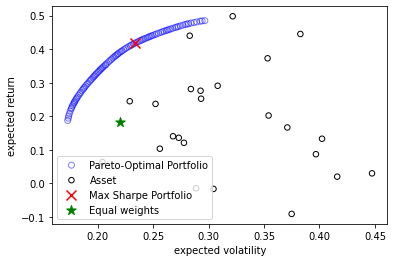

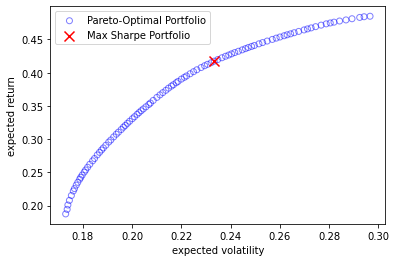

In [ ]:
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

# equal weights
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

In [ ]:
allocation = {name: w for name, w in zip(data.columns, X[max_sharpe])}
allocation = sorted(allocation.items(), key=operator.itemgetter(1), reverse=True)

print("Allocation With Best Sharpe")
for name, w in allocation:
    print(f"{name:<5} {w}")

Allocation With Best Sharpe
TMO   0.3798528908324
MSFT  0.2715221427647444
CPB   0.21433182733551745
FB    0.08120072219661383
DE    0.050996700443069094
JCI   0.0020957164276554294
BAX   0.0
BMY   0.0
CMCSA 0.0
CNP   0.0
HPQ   0.0
JPM   0.0
LUV   0.0
MMC   0.0
MO    0.0
NI    0.0
PCAR  0.0
PSA   0.0
SEE   0.0
SPY   0.0
T     0.0
TXT   0.0
VZ    0.0
ZION  0.0


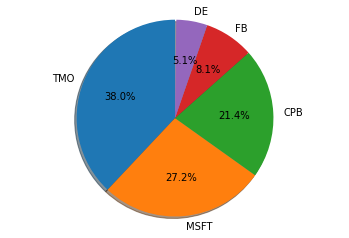

In [ ]:
for al in allocation:
    if al[1] <= 1e-2:
        allocation.remove(al)

col_name = []
w1 = []
for name, w in allocation:
    col_name.append(name)
    w1.append(w)
    
fig1, ax1 = plt.subplots()
ax1.pie(w1, labels=col_name, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

print("For equal weights: \nReturn     = ", (x.T @ mu)[0])
print("Volatility = ", (np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))[0][0])

For equal weights: 
Return     =  0.18414069769650415
Volatility =  0.22009100393776088


In [ ]:
x = X[max_sharpe].T

print("Best Sharpe: \nReturn     = ", x.T @ mu)
print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))

Best Sharpe: 
Return     =  0.4173605504980681
Volatility =  0.23337478701352712


In [ ]:
# To export jupyter notebook to html, save your notebook and run this cell
!jupyter nbconvert --to html Project_codes.ipynb